# Iris Flower Dataset Neural Network 
##### **A Statquest implementation of [Neural Networks Part 6: Cross Entropy](https://www.youtube.com/watch?v=6ArSys5qHAU&list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1&index=12)**
##### **And a Statquest implementation of[Neural Networks Part 7: Cross Entropy Derivatives and Backpropagation](https://www.youtube.com/watch?v=xBEh66V9gZo&list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1&index=13)**


![iris_dataset image.png](<./assets/iris_dataset_image.png>)

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import tqdm
import contextlib
import os

In [2]:
def set_seed(seed=1337):
    """Set seed for reproducibility across multiple libraries"""
             # Python's built-in random
    np.random.seed(seed)             # NumPy
    torch.manual_seed(seed)          # PyTorch on CPU
    torch.cuda.manual_seed(seed)     # PyTorch on current GPU device
    torch.cuda.manual_seed_all(seed) # PyTorch on all GPU devices
    os.environ["PYTHONHASHSEED"] = str(seed)
    
    # For complete reproducibility in PyTorch
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    
    print(f"Random seed set to {seed}")

# Set the random seed
set_seed(1337)  # You can change 42 to any integer you prefer

Random seed set to 1337


In [3]:
iris = pd.read_csv('IRIS.csv')
iris = iris.drop(columns=["sepal_length", "petal_length"])
iris["species"] = iris["species"].str.replace("Iris-", "")
# Print 3 examples of each species
for s in iris["species"].unique():
    print(f"\n{s}:")
    print(iris[iris["species"] == s].head(5))
    print("-" * 50)


setosa:
   sepal_width  petal_width species
0          3.5          0.2  setosa
1          3.0          0.2  setosa
2          3.2          0.2  setosa
3          3.1          0.2  setosa
4          3.6          0.2  setosa
--------------------------------------------------

versicolor:
    sepal_width  petal_width     species
50          3.2          1.4  versicolor
51          3.2          1.5  versicolor
52          3.1          1.5  versicolor
53          2.3          1.3  versicolor
54          2.8          1.5  versicolor
--------------------------------------------------

virginica:
     sepal_width  petal_width    species
100          3.3          2.5  virginica
101          2.7          1.9  virginica
102          3.0          2.1  virginica
103          2.9          1.8  virginica
104          3.0          2.2  virginica
--------------------------------------------------


In [4]:
sample_dataset = []
# Add 5 samples from each species class
for start_idx in [0, 50, 100]:  # Starting indices for setosa, versicolor, virginica
    for i in range(5):
        sample_dataset.append(iris.iloc[start_idx + i])
sample_dataset = pd.DataFrame(sample_dataset)
print("Indices of sample_dataset:", sample_dataset.index)
print(sample_dataset)

Indices of sample_dataset: Index([0, 1, 2, 3, 4, 50, 51, 52, 53, 54, 100, 101, 102, 103, 104], dtype='int64')
     sepal_width  petal_width     species
0            3.5          0.2      setosa
1            3.0          0.2      setosa
2            3.2          0.2      setosa
3            3.1          0.2      setosa
4            3.6          0.2      setosa
50           3.2          1.4  versicolor
51           3.2          1.5  versicolor
52           3.1          1.5  versicolor
53           2.3          1.3  versicolor
54           2.8          1.5  versicolor
100          3.3          2.5   virginica
101          2.7          1.9   virginica
102          3.0          2.1   virginica
103          2.9          1.8   virginica
104          3.0          2.2   virginica


In [5]:
# input nodes
petal_width = iris["petal_width"].values
sepal_width = iris["sepal_width"].values

# Combine petal_width and sepal_width into a 2D array
X = np.column_stack((petal_width, sepal_width)) 


# output nodes
species = iris["species"].values
label_encoder = LabelEncoder()
# output nodes encoded as integers, setosa = 0, versicolor = 1, virginica = 2
species_encoded = label_encoder.fit_transform(species) 
y = species_encoded
print(y) 
print("\n" + "="* 80)
# print(X)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]



In [6]:
# Normalize the input features 0 to 1
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# print(X)

In [7]:
# Convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# print(X_tensor)
# print(y_tensor)

## Standard Implementation of a Simple Model Architecture

### Images explaining the math on how to update the bias 3 parameter


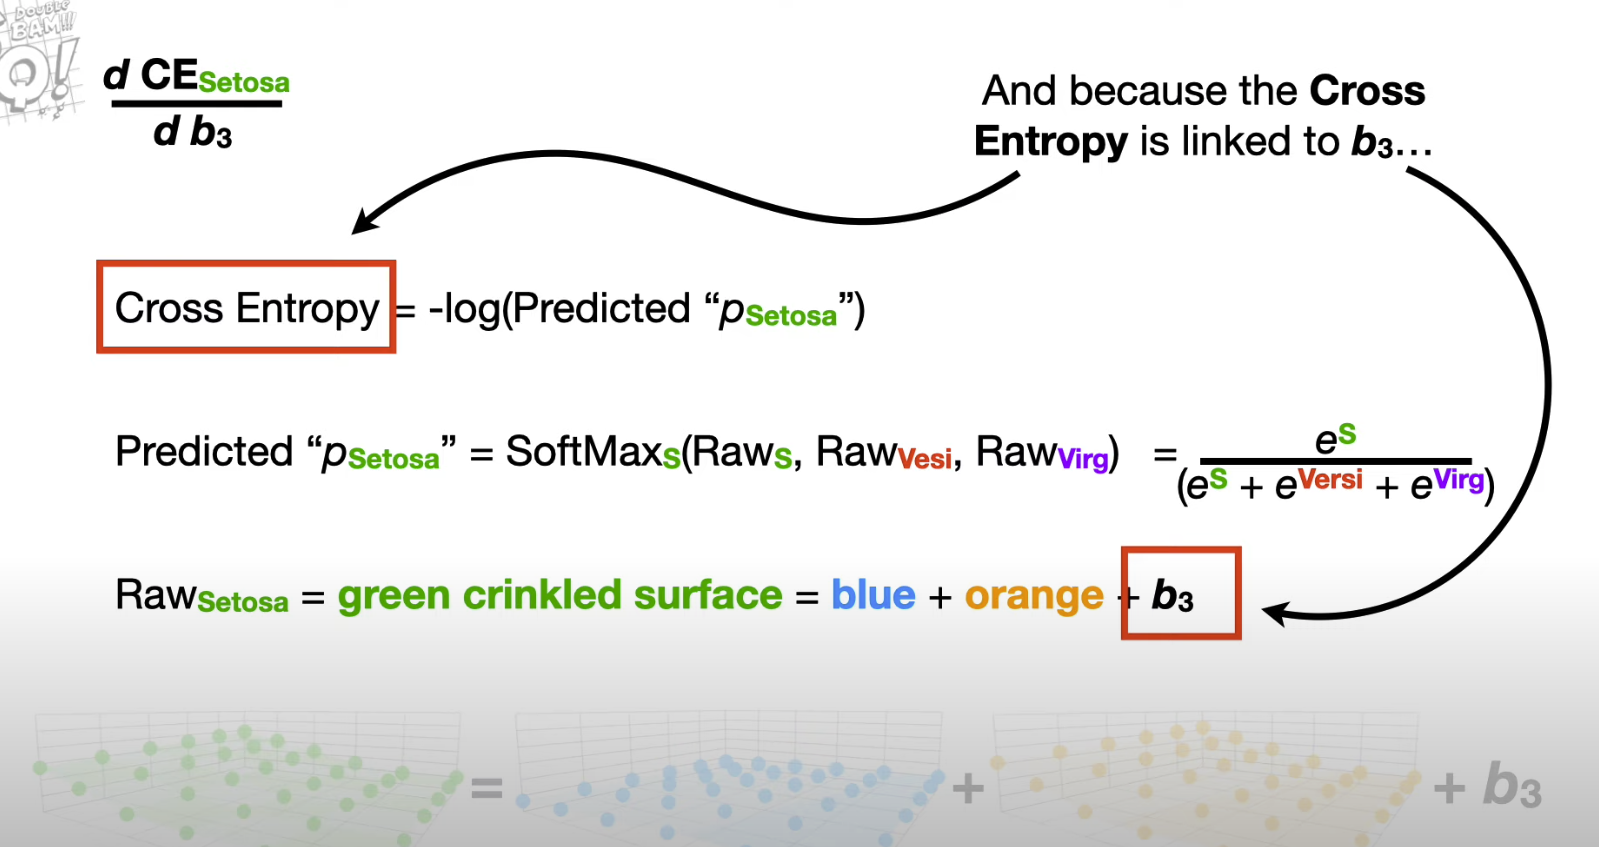

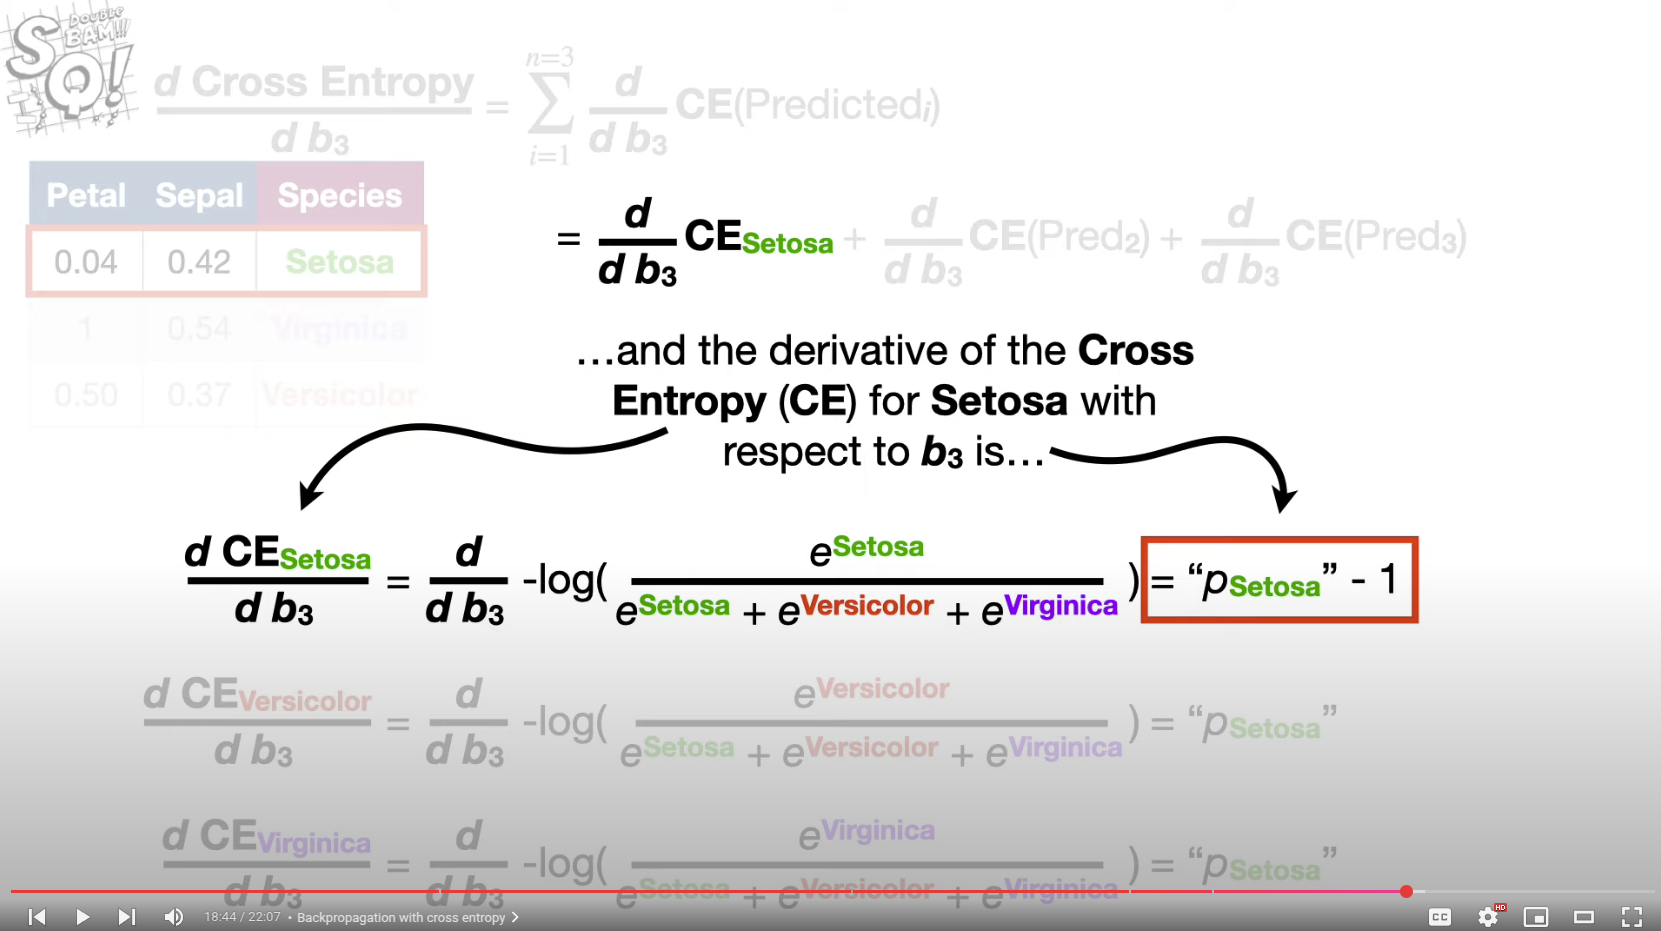

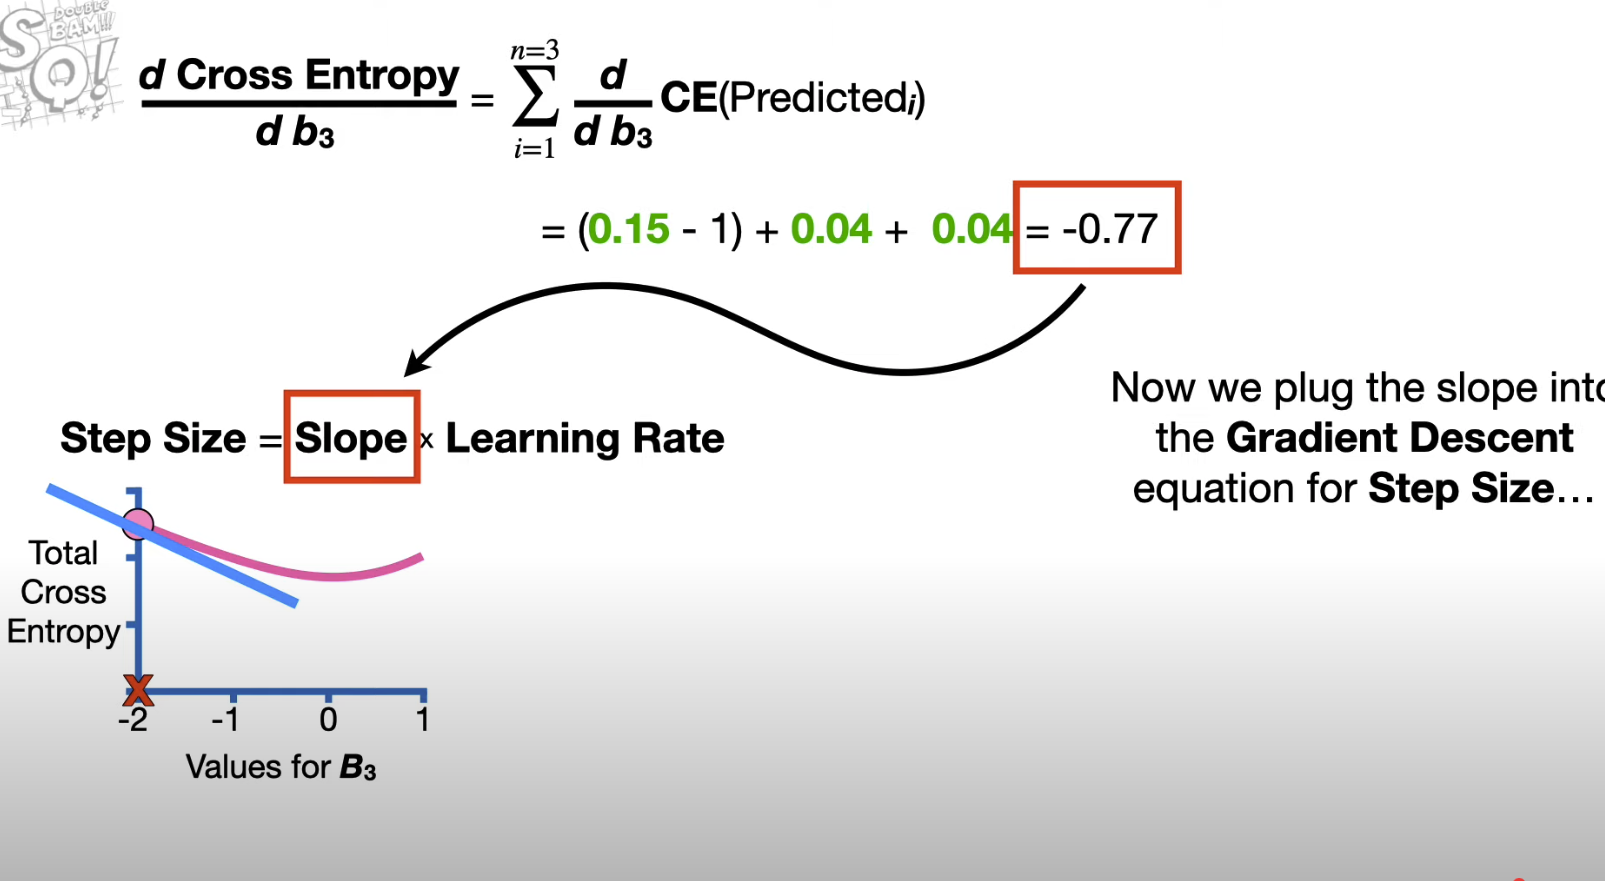

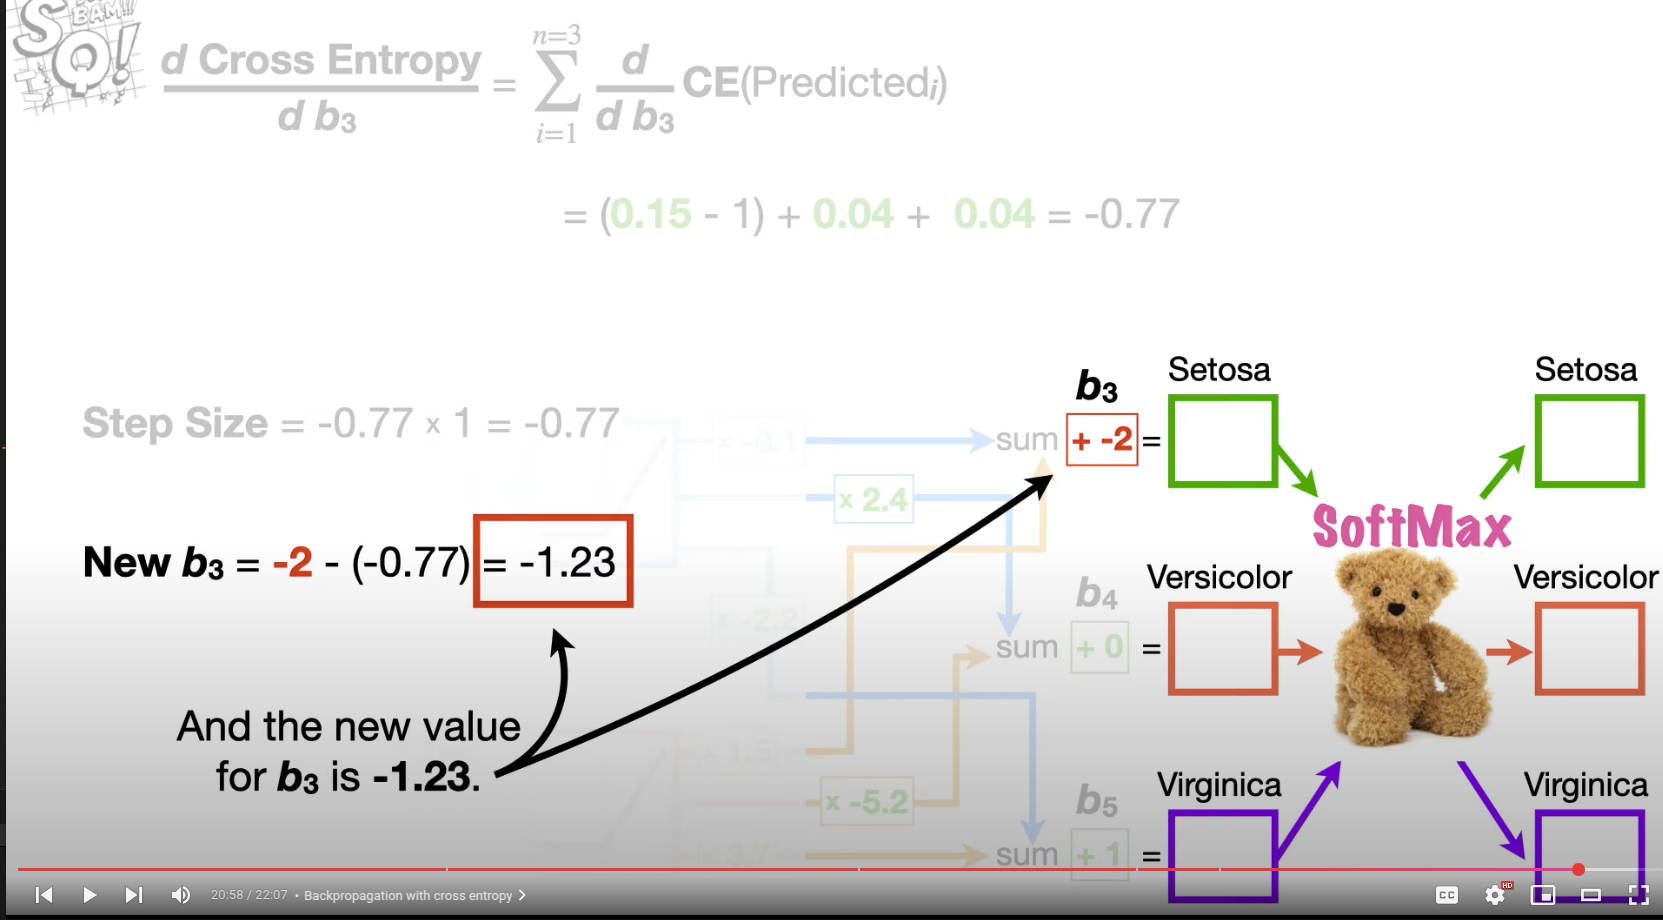

In [8]:
criterion = nn.CrossEntropyLoss()
class IrirsNetSimple(nn.Module):
    def __init__(self, input_size=2, hidden_size=2, output_size=3):
        super(IrirsNetSimple, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        self.z1 = self.fc1(x)  # Linear transformation
        self.a1 = self.relu(self.z1)  # Activation
        self.z2 = self.fc2(self.a1)  # Linear transformation
        return self.z2

    def backward(self, x, y, optimizer, epoch):
        # Forward pass
        logits = self.forward(x)  # Use our forward method
        
        # Compute the loss using CrossEntropyLoss
        cross_auto = criterion(logits, y)  # Using PyTorch's built-in CrossEntropyLoss

        # Manually computing the CrossEntropyLoss
        probabilities = torch.softmax(logits, dim=1)  # Softmax activation
        one_hot_targets = torch.zeros_like(probabilities).scatter_(1, y.unsqueeze(1), 1)
        loss = -torch.sum(one_hot_targets * torch.log(probabilities)) / x.size(0)

        # Compare the two loss values to ensure my manual implementation is correct
        if epoch == 1:
            print(f"CrossEntropyLoss (PyTorch): {cross_auto.item()}")
            print(f"CrossEntropyLoss (Manual): {loss.item()}")
            # Check if the two loss values are close
            assert torch.allclose(cross_auto, loss), "Loss values do not match!"
            # Print the loss
            print(f"Loss: {loss.item()}")

        # Optimizer.zero_grad() Manually below

        # Manually zero gradients for all parameters
        for param in self.parameters():
            if param.grad is not None:
                param.grad.zero_()


        loss.backward()

        # optimizer.step() Manually below

        # Manual parameter update
        for param in self.parameters(): # Adams parameter function
            # print(param) # to se the parameters
            if param.grad is not None: # Manually update the parameters with our learning rate
                param.data -= optimizer.param_groups[0]['lr'] * param.grad
        # Return the loss for logging   
        return loss.item()


In [9]:
criterion = nn.CrossEntropyLoss()
class IrirsNetSimple(nn.Module):
    def __init__(self, input_size=2, hidden_size=2, output_size=3):
        super(IrirsNetSimple, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        self.z1 = self.fc1(x)  # Linear transformation
        self.a1 = self.relu(self.z1)  # Activation
        self.z2 = self.fc2(self.a1)  # Linear transformation
        return self.z2

    def backward(self, x, y, optimizer, epoch):
        # Forward pass
        logits = self.forward(x)  # Use our forward method
        
        # Compute the loss using CrossEntropyLoss
        cross_auto = criterion(logits, y)  # Using PyTorch's built-in CrossEntropyLoss

        # Manually computing the CrossEntropyLoss
        probabilities = torch.softmax(logits, dim=1)  # Softmax activation
        one_hot_targets = torch.zeros_like(probabilities).scatter_(1, y.unsqueeze(1), 1)
        loss = -torch.sum(one_hot_targets * torch.log(probabilities)) / x.size(0)

        # Compare the two loss values to ensure my manual implementation is correct
        if epoch == 1:
            print(f"CrossEntropyLoss (PyTorch): {cross_auto.item()}")
            print(f"CrossEntropyLoss (Manual): {loss.item()}")
            # Check if the two loss values are close
            assert torch.allclose(cross_auto, loss), "Loss values do not match!"
            # Print the loss
            print(f"Loss: {loss.item()}")

        # Optimizer.zero_grad() Manually below

        # Manually zero gradients for all parameters
        for param in self.parameters():
            if param.grad is not None:
                param.grad.zero_()


        loss.backward()

        # optimizer.step() Manually below

        # Manual parameter update
        for param in self.parameters(): # Adams parameter function
            # print(param) # to se the parameters
            if param.grad is not None: # Manually update the parameters with our learning rate
                param.data -= optimizer.param_groups[0]['lr'] * param.grad
        # Return the loss for logging   
        return loss.item()


In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = IrirsNetSimple().to(device)

## Test the model with the sample data

In [11]:
X_sample = np.column_stack((sample_dataset["petal_width"].values,
                            sample_dataset["sepal_width"].values))
y_sample = sample_dataset["species"].values
label_encoder = LabelEncoder()
y_sample_encoded = label_encoder.fit_transform(y_sample)

X_sample = scaler.fit_transform(X_sample)

X_sample_tensor = torch.tensor(X_sample, dtype=torch.float32)
y_sample_tensor = torch.tensor(y_sample_encoded, dtype=torch.long)

print("X_sample_tensor:", X_sample_tensor)
print("y_sample_tensor:", y_sample_tensor)

X_sample_tensor: tensor([[0.0000, 0.9231],
        [0.0000, 0.5385],
        [0.0000, 0.6923],
        [0.0000, 0.6154],
        [0.0000, 1.0000],
        [0.5217, 0.6923],
        [0.5652, 0.6923],
        [0.5652, 0.6154],
        [0.4783, 0.0000],
        [0.5652, 0.3846],
        [1.0000, 0.7692],
        [0.7391, 0.3077],
        [0.8261, 0.5385],
        [0.6957, 0.4615],
        [0.8696, 0.5385]])
y_sample_tensor: tensor([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])


In [12]:
# Move sample tensors to the proper device
X_sample_tensor = X_sample_tensor.to(device)
y_sample_tensor = y_sample_tensor.to(device)

# Set the model to training mode
model.train()

num_epochs_sample = 100
sample_losses = []

for epoch in range(1, num_epochs_sample + 1):
    # Use the custom backward method to both forward and backward pass and update weights
    loss = model.backward(X_sample_tensor, y_sample_tensor, optimizer, epoch)
    sample_losses.append(loss)
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{num_epochs_sample}, Loss: {loss:.4f}")

# Plot the training loss on sample data
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs_sample + 1), sample_losses, 'b-', label="Sample Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training on Sample Data")
plt.legend()
plt.show()

NameError: name 'optimizer' is not defined

In [ ]:
# data settings if we want to use the whole dataset or sample dataset
X_DATA = X_tensor
y_DATA = y_tensor

# get train, val and test data
train_size = int(0.70 * len(X_DATA))
val_size = int(0.15 * len(X_DATA))
test_size = len(X_DATA) - train_size - val_size

train_data, val_data, test_data = torch.utils.data.random_split( 
    list(zip(X_DATA, y_DATA)), [train_size, val_size, test_size]
)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=16, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=16, shuffle=False)
# Print dataset sizes
print(f"Training set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Test set size: {len(test_data)}")


Training set size: 105
Validation set size: 22
Test set size: 23


### Here we can see the math behind each step of the training

In [ ]:
num_epochs = 250
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []


optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
for epoch in tqdm.trange(num_epochs, desc="Training Progress"):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        # Call the custom backward method, which performs forward and backward passes, and updates weights
        loss = model.backward(X_batch, y_batch, optimizer, epoch)
        total_loss += loss

        # Calculate training accuracy
        with torch.no_grad():
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            total_train += y_batch.size(0)
            correct_train += (predicted == y_batch).sum().item()

    # Validation phase
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    
    with torch.no_grad():
        for X_val, y_val in val_loader:
            X_val, y_val = X_val.to(device), y_val.to(device)
            logits = model(X_val)
            val_loss += criterion(logits, y_val).item()
            
            # Calculate validation accuracy
            _, predicted = torch.max(logits, 1)
            total_val += y_val.size(0)
            correct_val += (predicted == y_val).sum().item()
            
    train_losses.append(total_loss/len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)
    val_losses.append(val_loss/len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)
    
    


Training Progress:   6%|▌         | 14/250 [00:00<00:03, 61.40it/s]

CrossEntropyLoss (PyTorch): 1.2705328464508057
CrossEntropyLoss (Manual): 1.2705330848693848
Loss: 1.2705330848693848
CrossEntropyLoss (PyTorch): 1.2603521347045898
CrossEntropyLoss (Manual): 1.2603521347045898
Loss: 1.2603521347045898
CrossEntropyLoss (PyTorch): 1.329532504081726
CrossEntropyLoss (Manual): 1.3295326232910156
Loss: 1.3295326232910156
CrossEntropyLoss (PyTorch): 1.3804532289505005
CrossEntropyLoss (Manual): 1.38045334815979
Loss: 1.38045334815979
CrossEntropyLoss (PyTorch): 1.1789144277572632
CrossEntropyLoss (Manual): 1.1789143085479736
Loss: 1.1789143085479736
CrossEntropyLoss (PyTorch): 1.1957463026046753
CrossEntropyLoss (Manual): 1.1957461833953857
Loss: 1.1957461833953857
CrossEntropyLoss (PyTorch): 1.0962519645690918
CrossEntropyLoss (Manual): 1.0962518453598022
Loss: 1.0962518453598022


Training Progress: 100%|██████████| 250/250 [00:02<00:00, 118.94it/s]


In [ ]:
# Test the model on the test dataset
model.eval()
test_loss = 0.0
correct_test = 0
total_test = 0

with torch.no_grad():
    for X_test, y_test in test_loader:
        X_test, y_test = X_test.to(device), y_test.to(device)
        outputs = model(X_test)
        test_loss += criterion(outputs, y_test).item()
        
        _, predicted = torch.max(outputs, 1)
        total_test += y_test.size(0)
        correct_test += (predicted == y_test).sum().item()


Test Loss: 1.0968, Test Accuracy: 30.43%


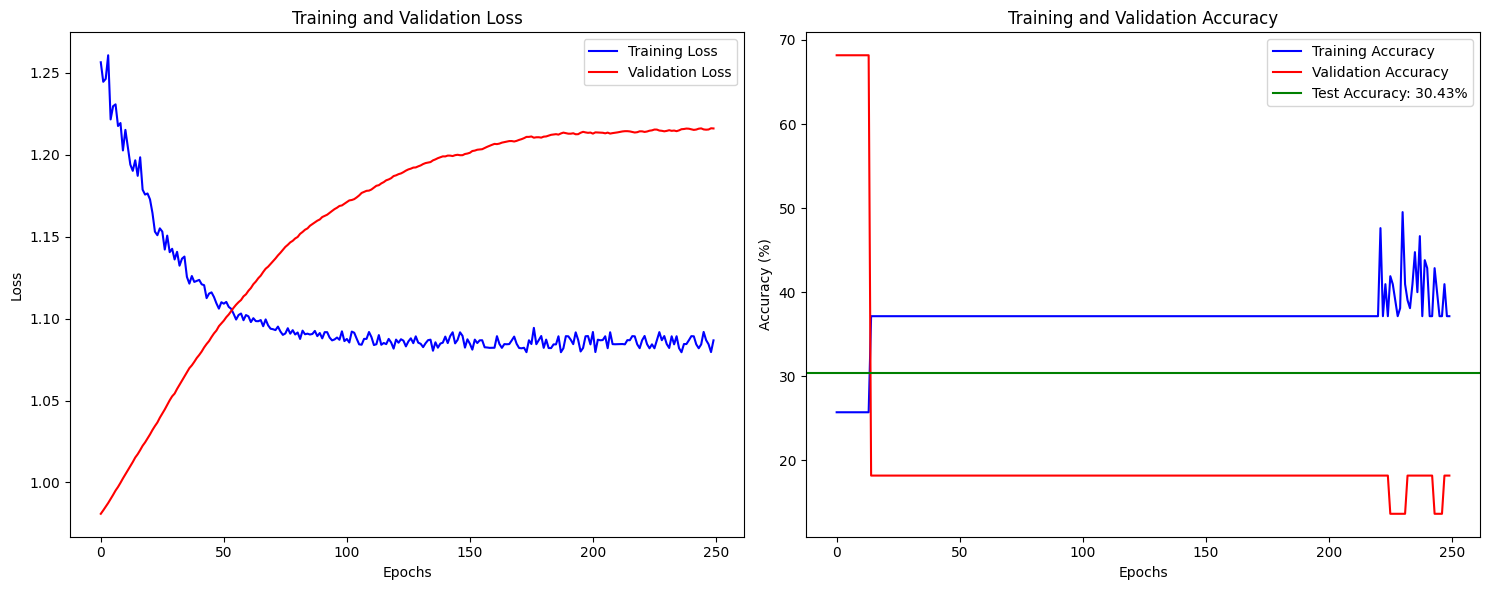

In [ ]:
test_accuracy = 100 * correct_test / total_test
print(f"\nTest Loss: {test_loss / len(test_loader):.4f}, Test Accuracy: {test_accuracy:.2f}%")

# Plot training and validation metrics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot losses - using all data points
ax1.plot(range(num_epochs), train_losses, 'b-', label='Training Loss')
ax1.plot(range(num_epochs), val_losses, 'r-', label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss')
ax1.legend()

# Plot accuracies - using all data points
ax2.plot(range(num_epochs), train_accuracies, 'b-', label='Training Accuracy')
ax2.plot(range(num_epochs), val_accuracies, 'r-', label='Validation Accuracy')
# Add horizontal line for test accuracy
ax2.axhline(y=test_accuracy, color='g', linestyle='-', label=f'Test Accuracy: {test_accuracy:.2f}%')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Training and Validation Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()